In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten
from keras.optimizers import Adam

In [4]:
# Load the rainfall dataset
dataset = pd.read_csv('Data1_Columbia.csv')


In [5]:
# Extract features and labels
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [7]:
# Reshape the input data for Conv1D
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [8]:
# Build the model
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(2))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(1, activation='linear'))

In [9]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['mse'])

In [10]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
386/386 [==============================] - 12s 13ms/step - loss: 7930.8486 - mse: 7930.8486 - val_loss: 6809.0986 - val_mse: 6809.0986
Epoch 2/100
386/386 [==============================] - 3s 8ms/step - loss: 5722.4321 - mse: 5722.4321 - val_loss: 5029.2988 - val_mse: 5029.2988
Epoch 3/100
386/386 [==============================] - 3s 8ms/step - loss: 4155.6162 - mse: 4155.6162 - val_loss: 3654.3677 - val_mse: 3654.3677
Epoch 4/100
386/386 [==============================] - 3s 8ms/step - loss: 2946.1548 - mse: 2946.1548 - val_loss: 2598.6426 - val_mse: 2598.6426
Epoch 5/100
386/386 [==============================] - 3s 8ms/step - loss: 2027.7996 - mse: 2027.7996 - val_loss: 1806.7440 - val_mse: 1806.7440
Epoch 6/100
386/386 [==============================] - 3s 8ms/step - loss: 1350.4116 - mse: 1350.4116 - val_loss: 1232.3285 - val_mse: 1232.3285
Epoch 7/100
386/386 [==============================] - 3s 8ms/step - loss: 870.1690 - mse: 870.1690 - val_loss: 833.5903 - val_m

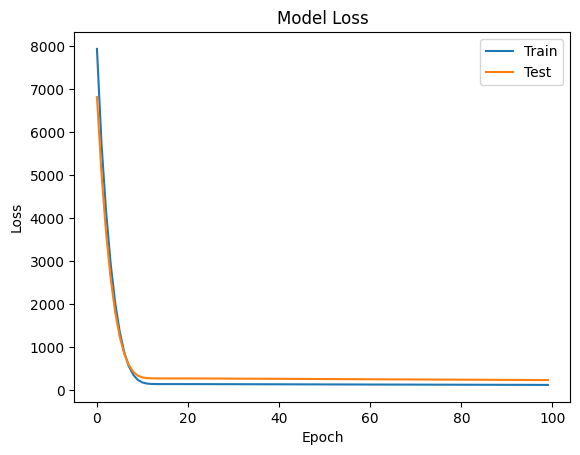

In [11]:
# Plot training and testing loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [14]:
# Evaluate the model
y_pred = model.predict(X_test)
mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100
print('Mean Absolute Percentage Error (MAPE): %.2f%%' % mape)

97/97 [==============================] - 0s 3ms/step
Mean Absolute Percentage Error (MAPE): 0.26%
